# 신뢰구간 복습

In [3]:
import numpy as np
import pandas as pd

In [7]:
sleep = pd.read_csv('sleep.csv')
sleep.head()

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5


In [8]:
import os

In [14]:
print(os.getcwd())

C:\Users\Minju\Desktop\TIL\minjukim\Statistics


### 선형모형 Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [12]:
x = sleep[['group']] # 그룹으로
y = sleep['extra']   # 수면시간을 예측
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 로지스틱 선형모형 Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
x = sleep[['extra']] # 수면시간으로 
y = sleep['group']   # 그룹을 예측 
model.fit(x, y)

C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
model.coef_

array([[0.38870779]])

### 실습) 위의 로지스틱 선형모형 평균의 95 % 신뢰구간 구하기

In [33]:
from sklearn.utils import resample

In [36]:
coefs = []
for _ in range(10000):
    df = resample(sleep)
    x = df[['extra']]
    y = df['group']
    
    model = LogisticRegression(solver='lbfgs')
    model.fit(x, y)
    coefs.append(model.coef_)

In [37]:
import seaborn as sns

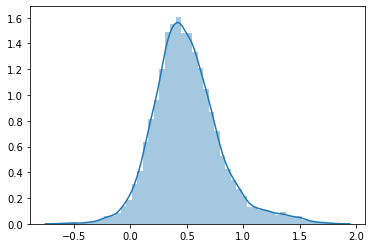

In [38]:
sns.distplot(coefs)

In [40]:
np.quantile(coefs, [.025, .975])

array([-0.01748728,  1.22239115])

# 실험
- 실험과 설문: 실험 설계, 집단 간 비교, 효과 크기, 설문지 만들기
- MAB: 탐색과 활용의 교환, 멀티 암드 밴딧, 추천 시스템

### 상관과 인과
- 상관Correlation: 두 변수가 함께 움직이는 정도
- 상관은 인과Causation 가 아니다
> ex. 아이스크림 판매량과 범죄 발생 건수

        → 직접 인과관계가 아니고, 기온에 영향을 받는다

### 실험
- 인과Causation 를 확인하기 위한 개입
- 조건Condition: 실험자가 체계적으로 변화시키는 독립변수의 각 단계

### 외생변수Extraneous Variables
- 실험의 독립/종속 변수가 아닌 변수
- 혼입 변수Confounding Variable: 종속 변수에 영향을 미치는 외생 변수
- 일정 범위로 고정시키거나 통계적으로 통계

### 종속변수Dependent Variables 고르기
- 실험의 목적을 고려
> ex. 고객 만족도는 중요한가? 고객만족도와 매출이 상관관계가 있는지

### 매개변수Mediator 사용
- 독립변수 → 매개변수 → 종속변수
> ex. 넷플릭스에서 고객 이탈률 vs 체류시간

        → 체류시간을 늘리면 이탈하지 않는다

### 실습) 실험의 변수 고르기
- 해보고 싶은 실험: 버티컬마우스가 손목 통증을 줄여주는지
- 실험의 변수
    - 독립변수(조건): 버티컬마우스 사용 여부
    - 외생변수: 폰 사용 시간, 실험 대상자들의 손목 상태
    - 종속변수(또는 매개변수): 손목 상태

### Counterbalancing
- 조건들의 순서에 균형을 맞추는 것
    - 사람마다 순서를 바꿔야 함
    - 순서가 영향을 미치기 때문

- 무작위
> ABC ACB BAC ...
- 라틴 스퀘어Latin Square(~=마방진): 순서 자체는 고정이나 무엇을 먼저할지만 바꾼다
> ABC BCA CAB

# 두 그룹의 수면시간 차이

In [43]:
sleep.groupby('group').mean()

,Unnamed: 0,extra,ID
group,,,
1,5.5,0.75,5.5
2,15.5,2.33,5.5


### 두 집단의 평균 차이
- 같은 모집단에서 두 번 샘플링하면 약간 다른 샘플이 만들어짐
- 실험에서 각 조건들은 같은 모집단에서 샘플링된 것인가(=실제로는 같음), 아니면 다른 모집단에서 샘플링된 것인가(=실제로 다름)
- 우도의 논리: 같은 모집단에서 샘플링했을 때)가정_ 이런 차이가 관찰될 수 있을까?
- 계산하는 방법: 신뢰구간을 구한다

### BootStrapping을 이용한 평균 차이 검증
- 집단을 무시하고 데이터를 모두 섞는다(동일한 모집단 대용)
- 
- 관찰된 차이가 95* % 신뢰구간 안 쪽이라면, 같은 모집단 안에서도 나올 수 있는 차이
> 같은 모집단이라고 친다

* 신뢰수준은 필요에 따라 조정한다

In [50]:
s = resample(sleep['extra'])

#### .loc 는 이름으로 위치 지정 
#### .iloc 은 index 로 위치 지정

In [51]:
s.iloc[0:10] # 여기서는 s.head(10) 과 같음

18    4.6
16    5.5
10    1.9
2    -0.2
2    -0.2
4    -0.1
18    4.6
10    1.9
8     0.0
16    5.5
Name: extra, dtype: float64

In [52]:
d = s.iloc[0:10].mean() - s.iloc[10:20].mean()
d

1.29

In [53]:
# 리샘플링한 데이터를 두 뭉텅이로 무작위로 나누어 평균 차이를 본다  
diffs = []
for _ in range(30000):
    s = resample(sleep['extra'])
    d = s.iloc[0:10].mean() - s.iloc[10:20].mean()
    diffs.append(d)

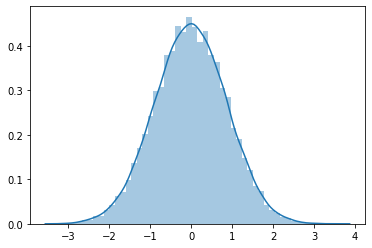

In [54]:
sns.distplot(diffs)

In [55]:
np.quantile(diffs, [.025, .975])

array([-1.74,  1.7 ])

### 실제 실험
무작위 → 조건마다 다르게 → 차이 1.53
### 시뮬레이션
무작위 → → → → → → → → 차이 +- 1.73

- <실제 실험> 값이 <시뮬레이션> 신뢰 구간 안에 들어간다면 
> : 조건이 무의미하다

- 신뢰구간 밖에 있다면
> : 조건이 유의미하다


### 오류의 종류
검증결과\실제 |다름 |같음
---|---|---
다름 | - | False Alarm 1종 오류
같음 | Miss 2종 오류 | -

### 신뢰수준과 유의수준
- 신뢰수준 = 100 % - 유의수준
- 신뢰수준 = 95 % 이면, 유의수준 = 5 %
- 유의수준 = 1종 오류의 확률

신뢰수준 | 유의수준(1종 오류의 확률)
---|---
100 % | 0 %
95 % | 5 %

- 1종 오류를 줄이면 2종 오류가 늘어나고
- 2종 오류를 줄이면 1종 오류가 늘어난다

> 둘 다 줄이려면 샘플 크기를 키워야한다

In [57]:
np.quantile(diffs, [.005, .995]) # 유의수준 0.5%

array([-2.3    ,  2.23005])